In [89]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from FCPython import createPitch
from statsbombpy import sb
import warnings

# Suppress the NoAuthWarning from statsbombpy
warnings.filterwarnings("ignore", category=UserWarning, module="statsbombpy.api_client")

In [86]:
# View competitions list and navigate to the one of interest (FIFA World Cup)
competitions = sb.competitions()
competitions.shape
competitions.columns
competitions.competition_name.value_counts()

competition_name
La Liga                    18
Champions League           18
FIFA World Cup              8
Copa del Rey                3
FA Women's Super League     3
Women's World Cup           2
Premier League              2
Liga Profesional            2
Serie A                     2
UEFA Women's Euro           1
UEFA Europa League          1
UEFA Euro                   1
1. Bundesliga               1
NWSL                        1
North American League       1
Indian Super league         1
FIFA U20 World Cup          1
Ligue 1                     1
Name: count, dtype: int64

In [87]:
# Filter competitions to world cup games only
world_cup = competitions[competitions.competition_name == 'FIFA World Cup']
world_cup

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
26,43,106,International,FIFA World Cup,male,False,True,2022,2023-08-12T16:44:27.619465,2023-08-17T15:55:15.164685,2023-08-17T15:55:15.164685,2023-08-12T16:44:27.619465
27,43,3,International,FIFA World Cup,male,False,True,2018,2023-07-24T13:09:34.513519,2021-06-13T16:17:31.694,None,2023-07-24T13:09:34.513519
28,43,55,International,FIFA World Cup,male,False,True,1990,2023-06-28T10:58:20.137929,2021-06-12T16:17:31.694,None,2023-06-28T10:58:20.137929
29,43,54,International,FIFA World Cup,male,False,True,1986,2023-06-28T11:20:34.252935,2021-06-13T16:17:31.694,None,2023-06-28T11:20:34.252935
30,43,51,International,FIFA World Cup,male,False,True,1974,2023-07-17T23:19:58.853207,2021-06-13T16:17:31.694,None,2023-07-17T23:19:58.853207
31,43,272,International,FIFA World Cup,male,False,True,1970,2023-07-17T23:24:45.579886,None,None,2023-07-17T23:24:45.579886
32,43,270,International,FIFA World Cup,male,False,True,1962,2023-06-26T10:38:00.323984,None,None,2023-06-26T10:38:00.323984
33,43,269,International,FIFA World Cup,male,False,True,1958,2023-06-26T10:33:08.214831,None,None,2023-06-26T10:33:08.214831


In [88]:
# Further filter world cup games to 2022's games
world_cup_22 = sb.matches(competition_id = 43, season_id = 106)
world_cup_22.shape

(64, 22)

In [80]:
# Find the France vs Morocco 'match_id' by checking the first 30 rows
world_cup_22.iloc[1:30]

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
2,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,...,2023-06-20T11:04:37.638969,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2
3,3857258,2022-11-24,21:00:00.000,International - FIFA World Cup,2022,Brazil,Serbia,2,0,available,...,2023-07-11T14:56:31.096588,1,Group Stage,Lusail Stadium,Alireza Faghani,Telê Santana da Silva,Dragan Stojković,1.1.0,2,2
4,3857288,2022-11-26,12:00:00.000,International - FIFA World Cup,2022,Tunisia,Australia,0,1,available,...,2023-04-27T00:30:07.835815,2,Group Stage,Al Janoub Stadium,Daniel Siebert,Jalel Kadri,Graham James Arnold,1.1.0,2,2
5,3857267,2022-11-29,17:00:00.000,International - FIFA World Cup,2022,Ecuador,Senegal,1,2,available,...,2023-05-19T13:52:07.885530,3,Group Stage,Sheikh Khalifa International Stadium,Clément Turpin,Gustavo Julio Alfaro,Aliou Cissé,1.1.0,2,2
6,3869321,2022-12-09,21:00:00.000,International - FIFA World Cup,2022,Netherlands,Argentina,2,2,available,...,2023-06-21T17:51:12.511460,5,Quarter-finals,Lusail Stadium,Antonio Miguel Mateu Lahoz,Louis van Gaal,Lionel Sebastián Scaloni,1.1.0,2,2
7,3857287,2022-11-24,15:00:00.000,International - FIFA World Cup,2022,Uruguay,South Korea,0,0,available,...,2023-04-27T00:36:59.281195,1,Group Stage,Education City Stadium,Clément Turpin,Diego Martín Alonso López,Paulo Jorge Gomes Bento,1.1.0,2,2
8,3869486,2022-12-10,17:00:00.000,International - FIFA World Cup,2022,Morocco,Portugal,1,0,available,...,2023-04-26T23:03:02.645780,5,Quarter-finals,Al Thumama Stadium,Facundo Tello Figueroa,Hoalid Regragui,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
9,3869685,2022-12-18,17:00:00.000,International - FIFA World Cup,2022,Argentina,France,3,3,available,...,2023-08-17T15:55:15.164685,7,Final,Lusail Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Didier Deschamps,1.1.0,2,2
10,3857260,2022-11-30,21:00:00.000,International - FIFA World Cup,2022,Saudi Arabia,Mexico,1,2,available,...,2023-04-27T00:02:11.099509,3,Group Stage,Lusail Stadium,Michael Oliver,Hervé Renard,Gerardo Daniel Martino,1.1.0,2,2


In [81]:
# Further filter to all events relavant to the France vs Morocco match 
fraMor = sb.events(match_id = 3869552)
fraMor.columns

/Applications/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_offensive', 'block_save_block', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_no_touch', 'dribble_nutmeg', 'dribble_outcome',
       'dribble_overrun', 'duel_outcome', 'duel_type', 'duration',
       'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_offensive', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_shot_saved_to_post', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_

In [82]:
# Check all the possible values in the 'type' column
fraMor.type.value_counts()

type
Pass                 1002
Ball Receipt*         919
Carry                 814
Pressure              308
Ball Recovery          95
Duel                   71
Goal Keeper            32
Miscontrol             31
Clearance              31
Block                  31
Dribble                30
Dispossessed           29
Foul Committed         28
Foul Won               27
Shot                   27
Interception           24
Dribbled Past          18
Substitution            7
Half Start              4
50/50                   4
Tactical Shift          4
Half End                4
Injury Stoppage         2
Referee Ball-Drop       2
Starting XI             2
Shield                  2
Offside                 1
Player Off              1
Player On               1
Name: count, dtype: int64

In [83]:
# Further filter to rows where the type column's values are 'Shot'
fraMor = fraMor[fraMor.type == 'Shot']

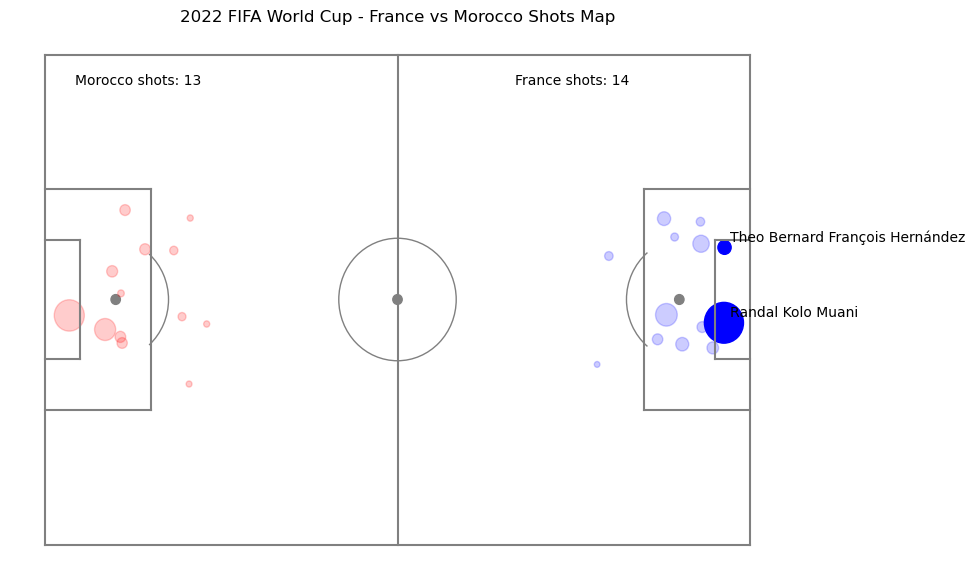

In [135]:
# Visualise Shots Map


# Set pitch size
pitch_width = 120
pitch_height = 80

# Create a football pitch using the FCPython library
fig, ax = createPitch(pitch_width, pitch_height, 'yards', 'gray')

# Define the home and away team names
home_team = 'France'
away_team = 'Morocco'

# Set parameters for shot visualisation
circle_size_multiplier = 13
alpha_non_goal = 0.2
text_offset = 1

# Iterate over each shot in the France vs Morocco match
for i, shot in fraMor.iterrows():
    x, y = shot['location']
    
    # Check if the shot resulted in a goal
    goal = shot['shot_outcome'] == 'Goal'
    team_name = shot['team']
    
    # Set circle size based on expected goals (xG)
    circle_size = np.sqrt(shot['shot_statsbomb_xg'] * circle_size_multiplier)
    
    # Plot shots on the pitch with different colors for home and away teams
    if team_name == home_team:
        x_plot, y_plot = x, pitch_height - y
    elif team_name == away_team:
        x_plot, y_plot = pitch_width - x, y
    
    # Plot shot circles
    color = 'blue' if team_name == home_team else 'red'
    shot_circle = plt.Circle((x_plot, y_plot), circle_size, color=color)
    
    # Set transparency for non-goals
    if not goal:
        shot_circle.set_alpha(alpha_non_goal)
    
    if goal:
        # Add player's name near the shot location
        plt.text(x_plot + text_offset, y_plot + text_offset, shot['player'])
        
    
    # Add the shot circle to the pitch
    ax.add_patch(shot_circle)
    
    

# Add text labels for the number of shots for each team
plt.text(5, 75, f'{away_team} shots: {len(fraMor[fraMor.team == away_team])}')
plt.text(80, 75, f'{home_team} shots: {len(fraMor[fraMor.team == home_team])}')

# Set the plot title
plt.title('2022 FIFA World Cup - France vs Morocco Shots Map')

# Set the figure size and save the plot as an image
fig.set_size_inches(10, 7)
fig.savefig('shots_display.png', dpi=300) 

# Display the plot
plt.show()

In [94]:
# Extract relevant columns for xG calculation
xG_df = fraMor[['period', 'minute', 'shot_statsbomb_xg', 'team', 'player', 'shot_outcome']]
xG_df = xG_df.copy()
xG_df

,period,minute,shot_statsbomb_xg,team,player,shot_outcome
3364,1,4,0.094596,France,Kylian Mbappé Lottin,Blocked
3383,2,78,0.033642,France,Kylian Mbappé Lottin,Blocked
3378,2,46,0.017669,France,Jules Koundé,Blocked
3384,2,78,0.852129,France,Randal Kolo Muani,Goal
3375,1,39,0.075545,France,Raphaël Varane,Off T
3374,1,35,0.263502,France,Olivier Giroud,Off T
3373,1,35,0.151004,France,Kylian Mbappé Lottin,Blocked
3382,2,73,0.040044,France,Youssouf Fofana,Off T
3372,1,34,0.061363,France,Youssouf Fofana,Off T
3370,1,32,0.040337,France,Aurélien Djani Tchouaméni,Blocked


In [103]:
# Extract data for the home team (France) and create a cumulative xG column
france_df = xG_df[xG_df['team'] == home_team]
france_df = france_df.copy()
france_df.sort_values(by='minute', inplace=True)
france_df['france_cum'] = france_df['shot_statsbomb_xg'].cumsum()
france_df

,period,minute,shot_statsbomb_xg,team,player,shot_outcome,france_cum
3364,1,4,0.094596,France,Kylian Mbappé Lottin,Blocked,0.094596
3365,1,4,0.097935,France,Theo Bernard François Hernández,Goal,0.192531
3368,1,16,0.098025,France,Olivier Giroud,Post,0.290556
3370,1,32,0.040337,France,Aurélien Djani Tchouaméni,Blocked,0.330893
3372,1,34,0.061363,France,Youssouf Fofana,Off T,0.392256
3371,1,34,0.060999,France,Olivier Giroud,Blocked,0.453255
3374,1,35,0.263502,France,Olivier Giroud,Off T,0.716758
3373,1,35,0.151004,France,Kylian Mbappé Lottin,Blocked,0.867761
3375,1,39,0.075545,France,Raphaël Varane,Off T,0.943307
3378,2,46,0.017669,France,Jules Koundé,Blocked,0.960976


In [102]:
# Extract data for the away team (Morocco) and create a cumulative xG column
morocco_df = xG_df[xG_df['team'] == away_team]
morocco_df = morocco_df.copy()
morocco_df.sort_values(by='minute', inplace=True)
morocco_df['morocco_cum'] = morocco_df['shot_statsbomb_xg'].cumsum()
morocco_df

,period,minute,shot_statsbomb_xg,team,player,shot_outcome,morocco_cum
3366,1,9,0.019247,Morocco,Azzedine Ounahi,Saved,0.019247
3367,1,16,0.061112,Morocco,Hakim Ziyech,Off T,0.080359
3369,1,25,0.020597,Morocco,Achraf Hakimi Mouh,Blocked,0.100956
3377,1,43,0.035301,Morocco,Sofiane Boufal,Off T,0.136257
3376,1,43,0.064088,Morocco,Jawad El Yamiq,Saved to Post,0.200344
3379,2,52,0.249369,Morocco,Yahia Attiyat allah,Wayward,0.449714
3380,2,53,0.020691,Morocco,Sofyan Amrabat,Off T,0.470405
3385,2,85,0.024939,Morocco,Zakaria Aboukhlal,Wayward,0.495344
3386,2,92,0.059507,Morocco,Abdessamad Ezzalzouli,Blocked,0.554851
3387,2,92,0.063791,Morocco,Azzedine Ounahi,Blocked,0.618642


In [106]:
# Extract goals for the home team (France) and create a column for score chart
france_goal = france_df[france_df['shot_outcome'].str.contains("Goal")].copy()
france_goal.loc[:, "scorechart"] = france_goal["minute"].astype(str) + "'" + " " + france_goal["player"]
france_goal

,period,minute,shot_statsbomb_xg,team,player,shot_outcome,france_cum,scorechart
3365,1,4,0.097935,France,Theo Bernard François Hernández,Goal,0.192531,4' Theo Bernard François Hernández
3384,2,78,0.852129,France,Randal Kolo Muani,Goal,2.002449,78' Randal Kolo Muani


In [116]:
# Extract goals for the away team (Morocco) and create a column for score chart
morocco_goal = morocco_df[morocco_df['shot_outcome'].str.contains("Goal")].copy()
morocco_goal.loc[:, "scorechart"] = morocco_goal["minute"].astype(str) + "'" + " " + morocco_goal["player"]
morocco_goal

,period,minute,shot_statsbomb_xg,team,player,shot_outcome,morocco_cum,scorechart


In [ ]:
# Calculate the total xG for both teams
france_total_xg = round(france_df['france_cum'].iloc[-1], 2).astype(str)
morocco_total_xg = round(morocco_df['morocco_cum'].iloc[-1], 2).astype(str)

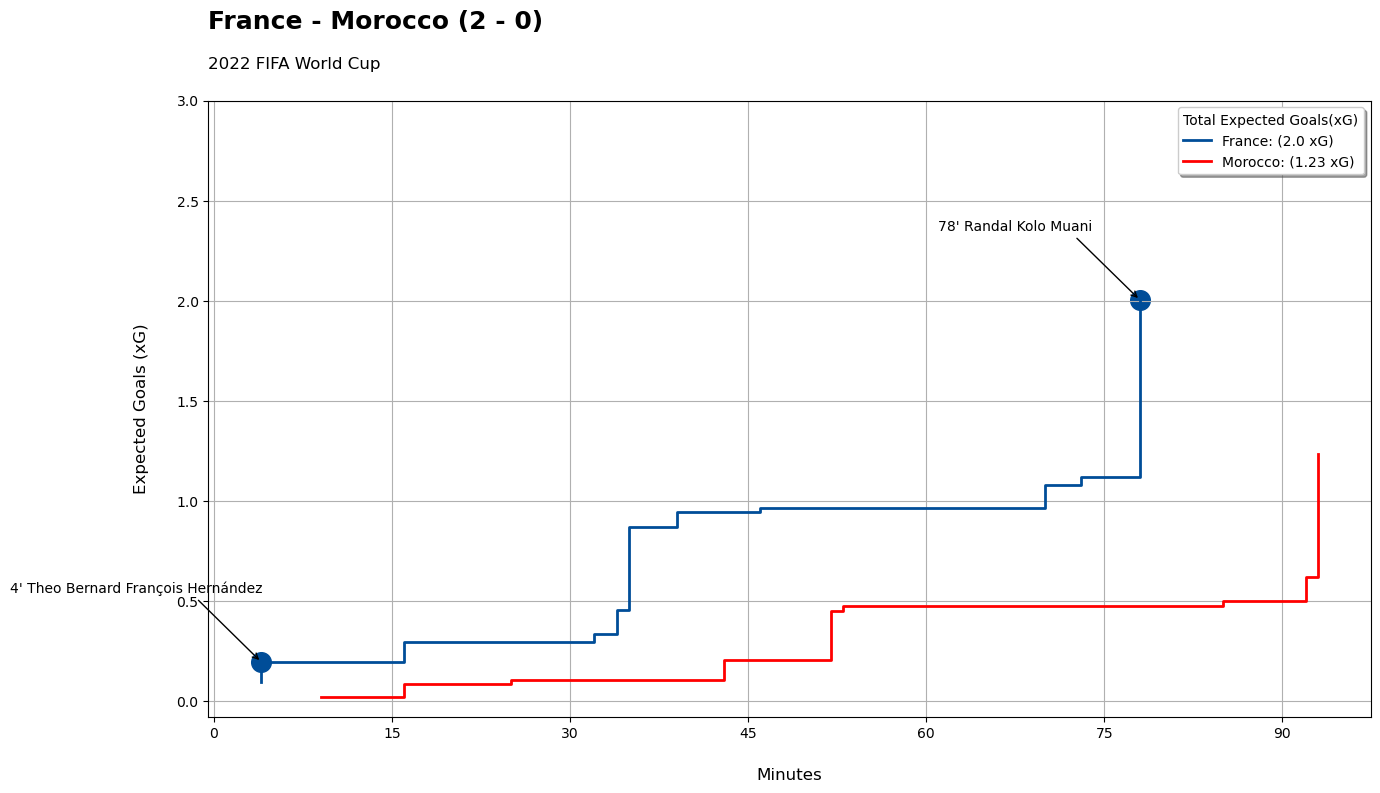

In [134]:
# Visualise xG Chart


# Create a subplot
fig, ax = plt.subplots(figsize=(15,8))

# Define marker type for scatter plots
ball = 'o'

# Plot cumulative xG for both teams
ax.step(x = france_df['minute'], y = france_df['france_cum'], where = 'post', color ='#004d98', label= home_team + ": " + "(" + france_total_xg + " xG)"  ,linewidth=2)  
ax.step(x = morocco_df['minute'], y = morocco_df['morocco_cum'], where = 'post', color = 'red', label= away_team + ": " + "(" + morocco_total_xg + " xG)" ,linewidth=2)

# Scatter plot for highlighting goals
ax.scatter(x= france_goal['minute'], y = france_goal['france_cum'] , marker= ball, s= 200 ,color = '#004d98')
ax.scatter(x= morocco_goal['minute'], y = morocco_goal['morocco_cum'] , marker= ball, s =200, color = 'red')


# Annotate goals on the plot for both teams
for j, txt in france_goal.iterrows():
    ax.annotate(txt['scorechart'], (txt['minute'], txt['france_cum']), xycoords='data', ha='center',
                xytext=(-90, 50), textcoords='offset points',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc,angleA=0,armA=50,rad=10", color='black'))

    
for i, txt in morocco_goal.iterrows():
    ax.annotate(txt['scorechart'], (txt['minute'], txt['morocco_cum']), xycoords='data', ha='center',
                xytext=(-90, 50), textcoords='offset points',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc,angleA=0,armA=50,rad=10", color='black'))
                

# Customise plot appearance
plt.xticks([0,15,30,45,60,75,90])
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
plt.grid()


# Set titles, legend, and labels
fig.text(s=home_team + " - " + away_team + " (" + str(len(france_goal)) + " - " + str(len(morocco_goal)) + ")", x=0.125, y=0.97, fontsize=18,fontweight="bold")
fig.text(s='2022 FIFA World Cup', x=0.125, y=0.92, fontsize=12)
legend = ax.legend(title = 'Total Expected Goals(xG)' ,loc='best', shadow=True)
legend._legend_box.align = "left"

plt.ylabel("Expected Goals (xG)", fontsize = 12, labelpad = 20)
plt.xlabel("Minutes", fontsize = 12, labelpad = 20)

# Save the plot as an image file
fig.savefig('xG_chart.png', dpi=300)
plt.show()